In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import itertools
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [22]:
file_path = 'kddcup.data_10_percent.gz'
df = pd.read_csv(file_path, header=None)

# Assign column names

In [23]:
df.columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome'
]

# Exploratory Data Analysis (EDA)

In [24]:
df.shape

(494021, 42)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [26]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
print(df.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [28]:
print("\nClass distribution:")
print(df['outcome'].value_counts())


Class distribution:
outcome
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64


# Preprocess the data

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Encode categorical features
for col in ['protocol_type', 'service', 'flag', 'outcome']:
    df[col] = LabelEncoder().fit_transform(df[col])


# Split data into features and labels

In [10]:
X = df.drop(columns=['outcome'])
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recursive Feature Elimination

In [11]:
# Train Random Forest model on all features
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Perform RFE for feature selection
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Get selected features
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i == True]
print("\nSelected features from RFE:", selected_features)


Selected features from RFE: ['service', 'flag', 'src_bytes', 'wrong_fragment', 'hot', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate']


# Train model with selected features

In [12]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [13]:
rfc_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [14]:
gbc_selected = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_selected.fit(X_train_selected, y_train)

GradientBoostingClassifier(random_state=42)

In [15]:
abc_selected = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_selected.fit(X_train_selected, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

# Evaluate the model with selected features

In [16]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{model_name} - Accuracy: {accuracy * 100:.3f}%')

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision'] * 100
    recall = report['1']['recall'] * 100
    f1 = report['1']['f1-score']
    
    print(f"Precision: {precision:.3f}%")
    print(f"Recall: {recall:.3f}%")
    print(f"F1 Score: {f1:.3f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(14, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()


Random Forest Classifier - Accuracy: 99.911%
Precision: 100.000%
Recall: 33.333%
F1 Score: 0.500


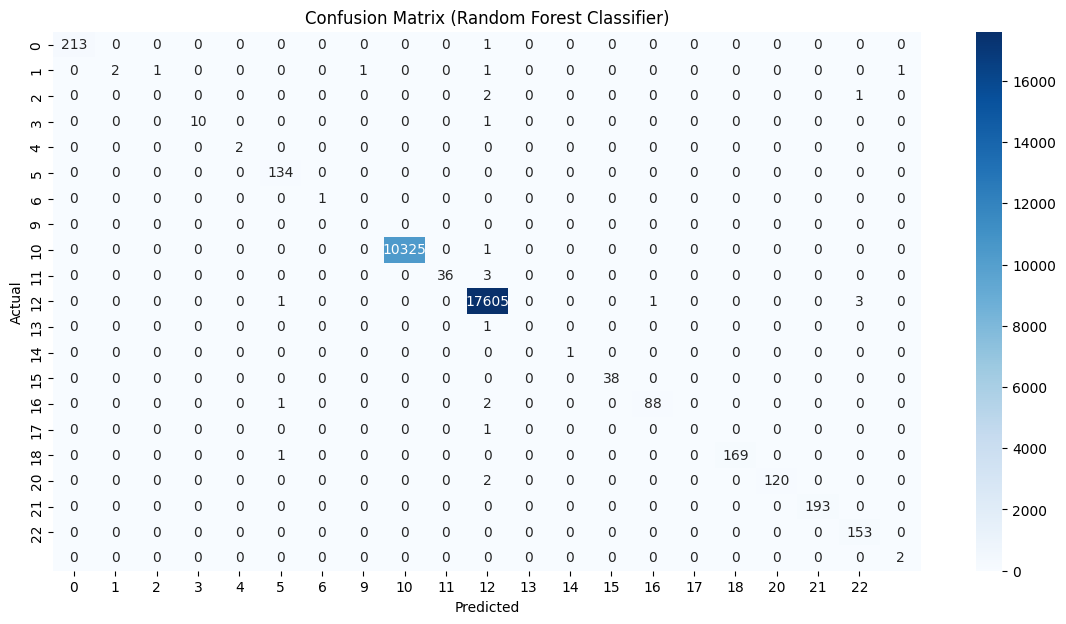

In [17]:
evaluate_model(rfc_selected, X_test_selected, y_test, 'Random Forest Classifier')


Gradient Boosting Classifier - Accuracy: 91.579%
Precision: 0.000%
Recall: 0.000%
F1 Score: 0.000


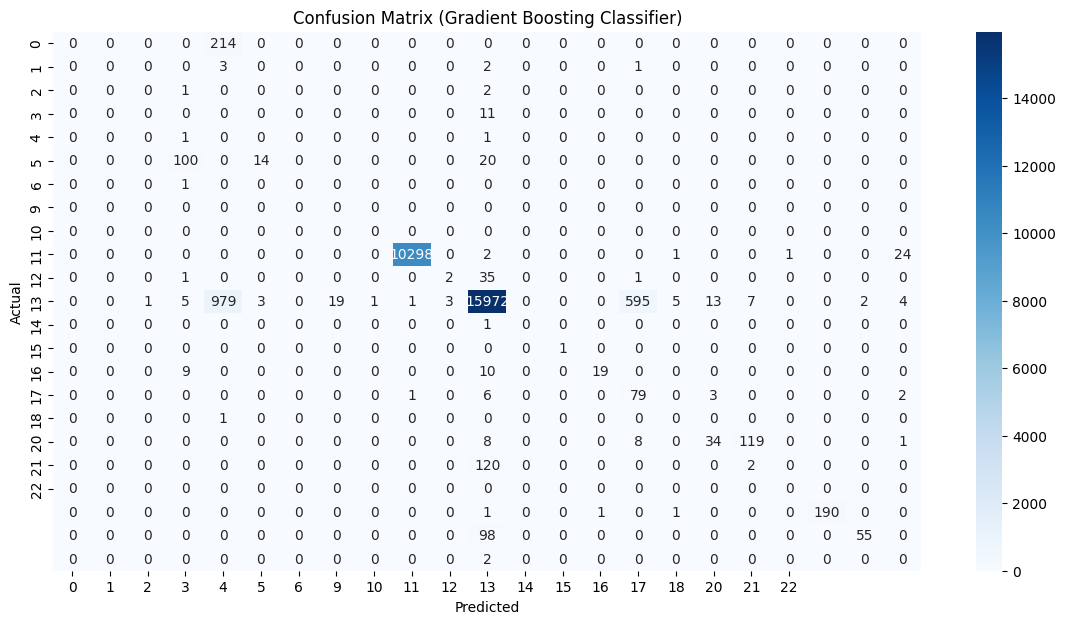

In [18]:
evaluate_model(gbc_selected, X_test_selected, y_test, 'Gradient Boosting Classifier')


AdaBoost Classifier - Accuracy: 95.820%
Precision: 0.000%
Recall: 0.000%
F1 Score: 0.000


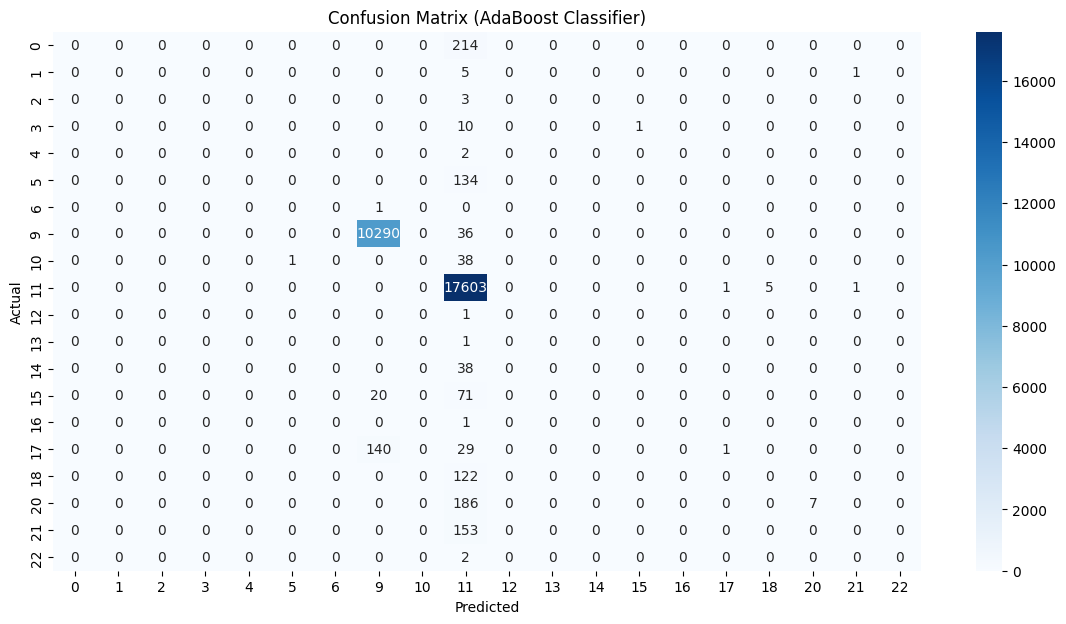

In [19]:
evaluate_model(abc_selected, X_test_selected, y_test, 'AdaBoost Classifier')